In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [3]:
best_stats = pd.read_csv(r'./l_optimal.csv',header=None,names=[0,'AUROC','HLD','MWF','WWS','NS','EP','SF'])

In [4]:
best_stats['SF'] = best_stats['SF'].str.upper()

In [5]:
best_stats.drop(0,axis=1,inplace=True)

In [6]:
len(best_stats)

56045

In [7]:
best_stats.sort_values('AUROC',ascending=False).head(10)

,AUROC,HLD,MWF,WWS,NS,EP,SF
42032,0.887560,150,5,1,1,25,DP
14032,0.886191,100,5,1,1,25,DP
36432,0.881556,150,3,1,1,25,DP
47632,0.879418,150,7,1,1,25,DP
44832,0.879235,150,6,1,1,25,DP
50432,0.878688,150,8,1,1,25,DP
16832,0.878547,100,6,1,1,25,DP
8432,0.878196,100,3,1,1,25,DP
19632,0.877670,100,7,1,1,25,DP
53232,0.877067,150,9,1,1,25,DP


In [8]:
n=42032
best_stats.iloc[n:n+4]

,AUROC,HLD,MWF,WWS,NS,EP,SF
42032,0.887560,150,5,1,1,25,DP
42033,0.739025,150,5,1,1,25,MCS
42034,0.836936,150,5,1,1,25,SCSSC
42035,0.804612,150,5,1,1,25,CSTVS


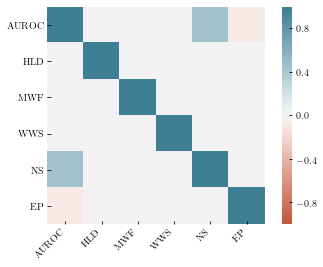

In [9]:
import seaborn as sns
corr = best_stats.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
sns.set(style="whitegrid")
sns.despine(offset=10, trim = True)

<Figure size 432x288 with 0 Axes>

In [12]:
best_dims = best_stats[best_stats['HLD']<200]

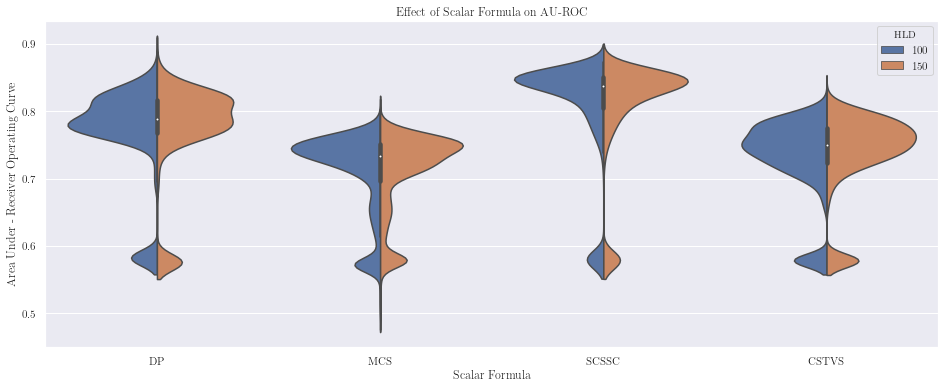

In [14]:
plt.figure(figsize=(16, 6))
sns.set(rc={'text.usetex' : True, 'font.family': 'serif'})
ax = sns.violinplot(x=best_dims['SF'],
                    y=best_dims['AUROC'],
                    hue=best_dims['HLD'],
                    split=True
                    #palette='Blues'
                   )
ax.set(
    title = "Effect of Scalar Formula on AU-ROC",
    xlabel = "Scalar Formula", 
    ylabel = "Area Under - Receiver Operating Curve" 
       );
fig_pdf = ax.get_figure()
fig_pdf.savefig(f'./figures/scalar_violin_plot.pdf',bbox_inches='tight')

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x=best_dims['EP'],
                    y=best_dims['AUROC'],
                    hue=best_dims['HLD'],
                    split=True,
                    palette='Blues'
                   )
ax.set(
    title = "Effect of Epoch Count on AUROC",
    xlabel = "Count of Training Epochs", 
    ylabel = "Area Under - Receiver Operating Curve" 
       );

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x=best_dims['WWS'],
                    y=best_dims['AUROC'],
                    hue=best_dims['HLD'],
                    split=True,
                    palette='Blues'
                   )
ax.set(
    title = "Effect of Word Window Size on AUROC",
    xlabel = "Size of Word Window", 
    ylabel = "Area Under - Receiver Operating Curve" 
       );

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x=best_dims['MWC'],
                    y=best_dims['AUROC'],
                    hue=best_dims['HLD'],
                    split=True,
                    palette='Blues'
                   )
ax.set(
    title = "Effect of Minimum Word Count on AUROC",
    xlabel = "Lower Threshold of Word Count", 
    ylabel = "Area Under - Receiver Operating Curve" 
       );

In [ ]:
best_dims.groupby(['SF','HD']).var()['AUROC']

In [ ]:
best_stats['AUROC'].plot.kde();